### 조건2

In [33]:
import os
import cv2
import numpy as np
import model3_hs
import img_preprocess
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

In [34]:
# PATH = "./product_images/true_ng/result/ok/"
# for i in os.listdir(PATH):
#     print(PATH + i)
#     preprocessing(PATH+i)

In [35]:
# img = cv2.imread(path)
# pred = model2_hj(img, show=True, thresh=4.0)
# print(pred)

In [36]:
def preprocessing(imgg):
    imageA = cv2.imread('./product_images/true_ok/GSY827AN7A1356_AAO11960K_PKT10_CM1EQSUA0012_20220711210457_DirectLight_OK.jpg')
    imageB = cv2.imread(imgg)
    
    img, img1 = img_preprocess.find_contours(imageA, sensor=True)
    dif, dif1 = img_preprocess.find_contours(imageB, sensor=True)
    #dif= cv2.resize(dif, dsize=(1836, 1432))
    img1= cv2.resize(img1, dsize=(1676, 1258))
    dif1= cv2.resize(dif1, dsize=(1676, 1258))
    
    tempDiff = cv2.subtract(img1, dif1)
    
    grayA = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(dif1, cv2.COLOR_BGR2GRAY)

    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff*255).astype("uint8")

    print(f"Similarity: {score:.5f}")

    thresh = cv2.threshold(diff, 0, 255,
                          cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # 차이점 빨간색으로 칠하기
    tempDiff[thresh == 255] = [0, 0, 255]

    cv2.imshow("img1", cv2.resize(img1, (960, 540)))
    cv2.imshow("dif1", cv2.resize(dif1, (960, 540)))
    cv2.imshow("Gray2", cv2.resize(tempDiff, (960, 540)))
#     cv2.imshow("Gray2", img_preprocess.img_resize(tempDiff, 800))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return tempDiff

In [37]:
# GSY827AN7C3501_AAO11690K_PKT12_CM1EQSUA0011_20220713001152_DirectLight_NG.jpg   (까다로운 먼지)
# GSY827BN8F0534_AAO32062K_PKT07_CM1EQSUA0012_20220815162431_DirectLight_NG.jpg   (까다로운 먼지)
# GSY848CN832941_AAO25314K_PKT15_CM1EQSUA0022_20220806165752_DirectLight_NG.jpg   (질문할 사진)
# GSY848AN7U0241_AAO14488K_PKT14_CM1EQSUA0012_20220728060237_DirectLight_NG.jpg   (까다로운 먼지)
# GSY848CN832410_AAO32159K_PKT06_CM1EQSUA0022_20220805210213_DirectLight_NG.jpg   (3번 조건)
# GSY827AN7A1641_AAO19043K_PKT06_CM1EQSUA0012_20220711220651_DirectLight_NG.jpg   (화면 깨짐)

In [46]:
# true_ng/GSY827BN8F0534_AAO32062K_PKT07_CM1EQSUA0012_20220815162431_DirectLight_NG.jpg
preprocessing("./product_images/true_ng/GSY827AN7A3201_AAO04063K_PKT14_CM1EQSUA0012_20220711155454_DirectLight_NG.jpg")

Similarity: 0.99561


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [64]:
def get_hists(img, mask=None, ranges=[0, 255]):
    """show image's distribution

    Args:
        img (3D/2D Array): image
        mask (cv2.inrange, optional): image where you wanna get hist. Defaults to None.
        ranges (list, optional): _description_. Defaults to [0, 255].

    Returns:
        hists (list): list of each component's hist
    """
    colors = ["b", "g", "r"]
    img_planes = cv2.split(img)
    hists = []
    for (p, c) in zip(img_planes, colors):
        try:
            hist = cv2.calcHist(
                [p],
                [0],
                mask,
                [256],
                ranges,
            )
            hists.append([hist, c])

        except:
            pass

    return hists

Similarity: 0.99699


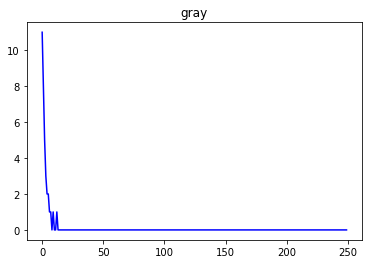

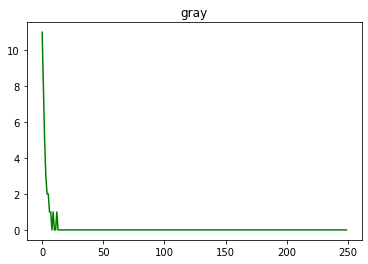

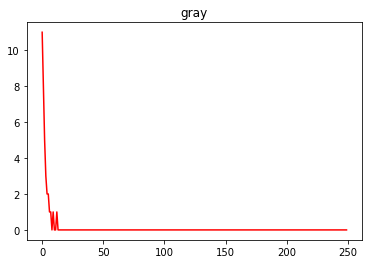

In [92]:
def make_mask(per, n):
    """ 이미지에 마진margin을 n만큼 설정해서 출력

    Args:
        per (ndarray): 이미지
        n (int): 마진margin 

    Returns:
        ndarray: 마진을 설정한 이미지
    """
    mask = np.zeros(per.shape[:2], np.uint8)
    mask[n : per.shape[0] - n, n : per.shape[1] - n] = 255
    return mask


tempdiff=preprocessing("./product_images/true_ok/GSY827AN7A1398_AAO20799K_PKT06_CM1EQSUA0012_20220711205612_DirectLight_OK.jpg")
mask = make_mask(tempdiff, 15)

# n = 10
# cv2.imshow('tempdiff', tempdiff[n :- n, n :- n])
# cv2.waitKey()
# cv2.destroyAllWindows()
hists = get_hists(tempdiff, mask=mask)
for hist, c in hists:
    plt.plot(hist[6:], color=c)
    plt.title("gray")
    plt.show()

In [93]:
hist=np.sum(hists[2][0][6:])
hist

35.0

In [ ]:
# new

# 정상
# 7번 - 33/ 8번 -  41/ 9번 - 36/ 10번 - 502/ 11번 - 64/ 12번 - 64/ 13번 - 32/ 14번 - 38/ 15번 - 31/ 16번 -27/

# 불량
# 7번 - 34 / 8번 - 26 / 9번 - 398/ 10번 - 40/ 11번 - 40/ 12번 - 125/ 13번 - 54/ 14번 - 38/ 15번 - 26/ 16번 -35/

In [69]:
def check_num(hist):
    if hist > 25:
        return "NG"
    else:
        return "OK"
        
check_num(hist)

'NG'

In [70]:
# original

# 정상
# 7번 - 33/ 8번 -  31/ 9번 - 29/ 10번 - 35/ 11번 - 39/ 12번 - 41/ 13번 - 32/ 14번 - 38/ 15번 - 31/ 16번 -27/

# 불량
# 7번 - 34 / 8번 - 26 / 9번 - 398/ 10번 - 40/ 11번 - 40/ 12번 - 125/ 13번 - 54/ 14번 - 38/ 15번 - 26/ 16번 -35/

In [12]:
# 양품, 불량 판정 기준
def defect_range(hist, file_path, name, imageB, num_OK, num_NG):
    """
    불량 검출 유무에 따라 양품, 불량 판정
    Args:
        cnt (int): _description_
        file_path (str): _description_
        name (str): _description_
        image (_type_): _description_
        num_OK (int): _description_
        num_NG (int): _description_

    Returns:
        int: _description_
    """
    if hist > 25:
        num_NG += 1
        pred = "NG"
    else:
        num_OK += 1
        pred = "OK"
    return pred

In [15]:
# cv2.imwrite(file_path + "result/ng/" + name, imageB